In [1]:
from ultralytics import YOLO

In [2]:
# Load a model
model = YOLO("yolo11n.pt")  # load an official model

In [6]:
# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /Users/aryan/Desktop/moondream-variphi/LMS_Experiment/Object_detection_Image/bus.jpg: 640x480 4 persons, 1 bus, 45.0ms
Speed: 2.7ms preprocess, 45.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
result = results[0]
result


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [16]:
from PIL import Image

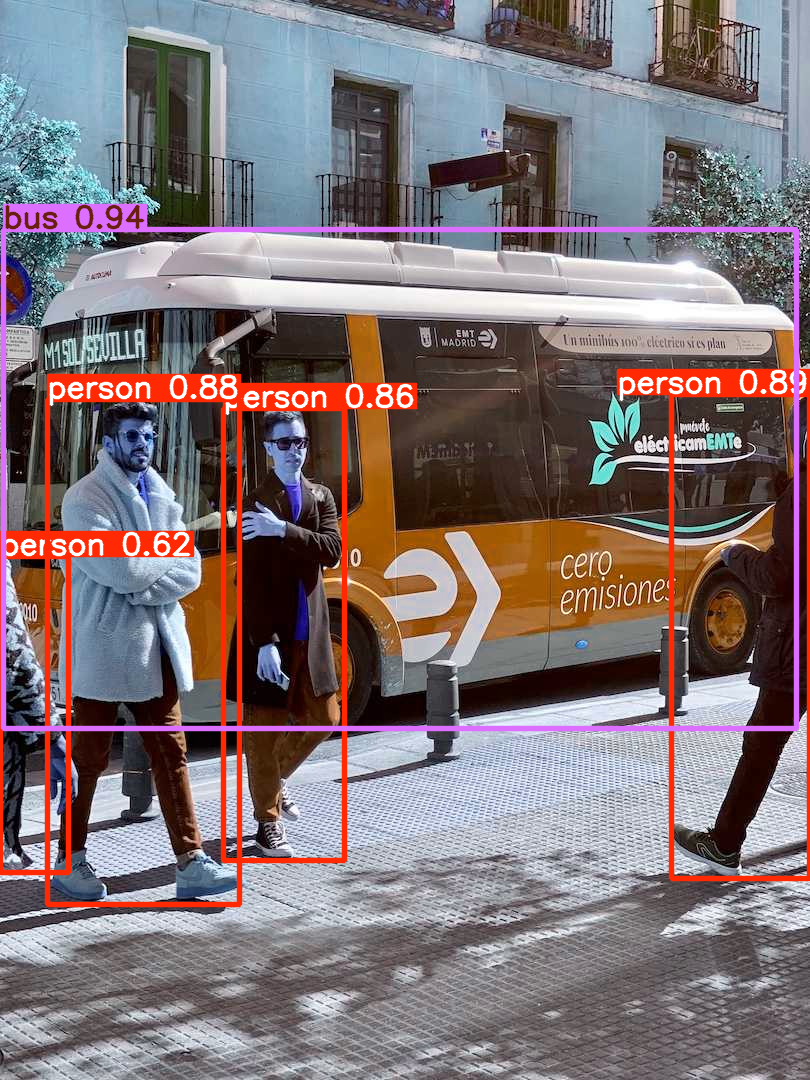

: 

In [ ]:
image = result.plot()

Image.fromarray(image)

In [13]:
len(results)
type(results)
for i in results:
    #print(i.boxes)
    print(type(i.boxes))
    print(len(i.boxes))
    print(i.boxes.xywh)




<class 'ultralytics.engine.results.Boxes'>
5
tensor([[400.0137, 478.8882, 792.3618, 499.0480],
        [740.4135, 636.7728, 138.7925, 483.8794],
        [143.3527, 651.8801, 191.8959, 504.6299],
        [283.7633, 634.5622, 121.4087, 451.7472],
        [ 34.4536, 714.2139,  68.8637, 316.2906]])


In [ ]:
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    print("~~~~~~~~~~~~~~~~~~~~~~")
    print("xywh======>",xywh)
    print("xywhn====>",xywhn)
    print("~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~
xywh======> tensor([[400.0137, 478.8882, 792.3618, 499.0480],
        [740.4135, 636.7728, 138.7925, 483.8794],
        [143.3527, 651.8801, 191.8959, 504.6299],
        [283.7633, 634.5622, 121.4087, 451.7472],
        [ 34.4536, 714.2139,  68.8637, 316.2906]])
xywhn====> tensor([[0.4938, 0.4434, 0.9782, 0.4621],
        [0.9141, 0.5896, 0.1713, 0.4480],
        [0.1770, 0.6036, 0.2369, 0.4672],
        [0.3503, 0.5876, 0.1499, 0.4183],
        [0.0425, 0.6613, 0.0850, 0.2929]])
~~~~~~~~~~~~~~~~~~~~~


## Manual Bounding Box Plotting - Understanding Coordinates

### YOLO Bounding Box Format (xywh):
- **First value**: Center X coordinate
- **Second value**: Center Y coordinate  
- **Third value**: Width of box
- **Fourth value**: Height of box

### Do you need to rescale?
- **xywh**: Already in pixel coordinates → NO rescaling needed
- **xywhn**: Normalized (0-1) → YES, multiply by image width/height 




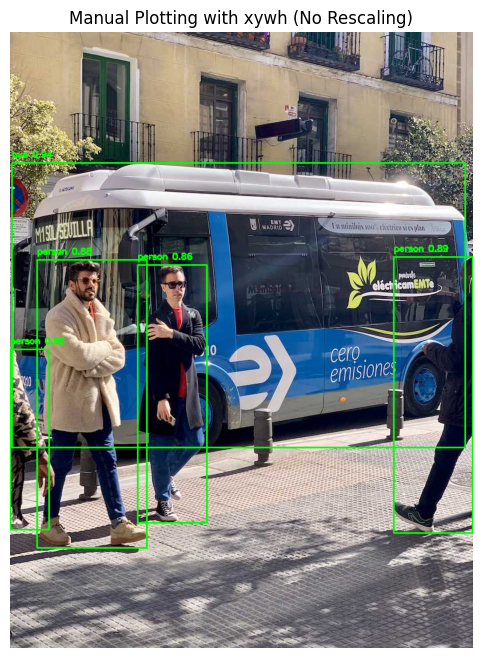

In [17]:
## Example 1: Manual plotting using xywh (NO RESCALING NEEDED)

import cv2
import numpy as np
from PIL import Image

# Get the original image
for result in results:
    # Get original image as numpy array
    img = result.orig_img.copy()
    
    # Get bounding boxes in xywh format (already in pixel coordinates)
    boxes_xywh = result.boxes.xywh.cpu().numpy()
    
    # Get class names and confidence scores
    classes = result.boxes.cls.cpu().numpy()
    confidences = result.boxes.conf.cpu().numpy()
    
    # Draw each bounding box manually
    for i, box in enumerate(boxes_xywh):
        # Extract center coordinates, width, and height
        center_x, center_y, width, height = box
        
        # Convert from center format (xywh) to corner format (x1, y1, x2, y2)
        x1 = int(center_x - width / 2)
        y1 = int(center_y - height / 2)
        x2 = int(center_x + width / 2)
        y2 = int(center_y + height / 2)
        
        # Draw rectangle (NO RESCALING - already in pixels!)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Add label
        label = f"{result.names[int(classes[i])]} {confidences[i]:.2f}"
        cv2.putText(img, label, (x1, y1 - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Manual Plotting with xywh (No Rescaling)")
    plt.axis('off')
    plt.show()


Image dimensions: 810x1080


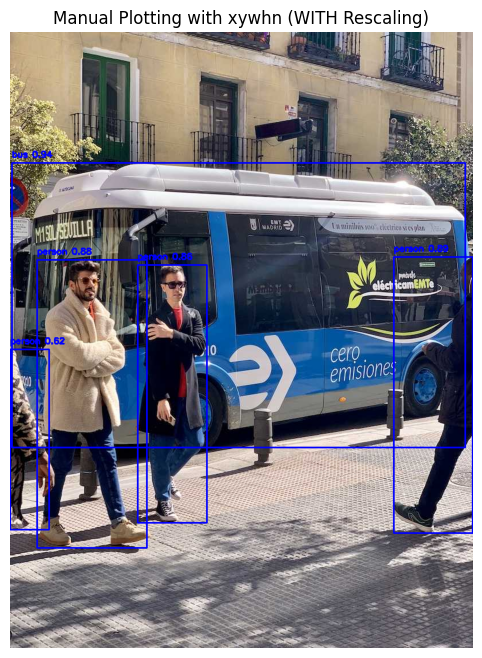

In [18]:
## Example 2: Manual plotting using xywhn (RESCALING REQUIRED!)

for result in results:
    # Get original image
    img = result.orig_img.copy()
    img_height, img_width = img.shape[:2]
    
    print(f"Image dimensions: {img_width}x{img_height}")
    
    # Get NORMALIZED bounding boxes (0-1 range)
    boxes_xywhn = result.boxes.xywhn.cpu().numpy()
    
    # Get class names and confidence scores
    classes = result.boxes.cls.cpu().numpy()
    confidences = result.boxes.conf.cpu().numpy()
    
    # Draw each bounding box manually
    for i, box in enumerate(boxes_xywhn):
        # Extract normalized center coordinates, width, and height
        center_x_norm, center_y_norm, width_norm, height_norm = box
        
        # ⚠️ RESCALE TO PIXEL COORDINATES (multiply by image dimensions)
        center_x = center_x_norm * img_width
        center_y = center_y_norm * img_height
        width = width_norm * img_width
        height = height_norm * img_height
        
        # Convert from center format to corner format
        x1 = int(center_x - width / 2)
        y1 = int(center_y - height / 2)
        x2 = int(center_x + width / 2)
        y2 = int(center_y + height / 2)
        
        # Draw rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        # Add label
        label = f"{result.names[int(classes[i])]} {confidences[i]:.2f}"
        cv2.putText(img, label, (x1, y1 - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Manual Plotting with xywhn (WITH Rescaling)")
    plt.axis('off')
    plt.show()


In [19]:
## Summary: All Available YOLO Bounding Box Formats

for result in results:
    print("=" * 80)
    print("YOLO Bounding Box Formats Available:")
    print("=" * 80)
    
    # Get first detection as example
    first_box_idx = 0
    
    # 1. XYWH - Center format in pixels
    xywh = result.boxes.xywh[first_box_idx].cpu().numpy()
    print(f"\n1. boxes.xywh (center_x, center_y, width, height in PIXELS)")
    print(f"   {xywh}")
    print(f"   ✅ NO rescaling needed - already in pixel coordinates")
    
    # 2. XYWHN - Center format normalized
    xywhn = result.boxes.xywhn[first_box_idx].cpu().numpy()
    print(f"\n2. boxes.xywhn (center_x, center_y, width, height NORMALIZED 0-1)")
    print(f"   {xywhn}")
    print(f"   ⚠️  Rescaling needed - multiply by image width/height")
    
    # 3. XYXY - Corner format in pixels
    xyxy = result.boxes.xyxy[first_box_idx].cpu().numpy()
    print(f"\n3. boxes.xyxy (x1, y1, x2, y2 in PIXELS)")
    print(f"   {xyxy}")
    print(f"   ✅ NO rescaling needed - top-left (x1,y1), bottom-right (x2,y2)")
    
    # 4. XYXYN - Corner format normalized
    xyxyn = result.boxes.xyxyn[first_box_idx].cpu().numpy()
    print(f"\n4. boxes.xyxyn (x1, y1, x2, y2 NORMALIZED 0-1)")
    print(f"   {xyxyn}")
    print(f"   ⚠️  Rescaling needed - multiply by image width/height")
    
    print("\n" + "=" * 80)
    print("💡 TIP: Use boxes.xyxy for easiest manual plotting (corner coordinates)")
    print("=" * 80)


YOLO Bounding Box Formats Available:

1. boxes.xywh (center_x, center_y, width, height in PIXELS)
   [     400.01      478.89      792.36      499.05]
   ✅ NO rescaling needed - already in pixel coordinates

2. boxes.xywhn (center_x, center_y, width, height NORMALIZED 0-1)
   [    0.49384     0.44342     0.97822     0.46208]
   ⚠️  Rescaling needed - multiply by image width/height

3. boxes.xyxy (x1, y1, x2, y2 in PIXELS)
   [     3.8328      229.36      796.19      728.41]
   ✅ NO rescaling needed - top-left (x1,y1), bottom-right (x2,y2)

4. boxes.xyxyn (x1, y1, x2, y2 NORMALIZED 0-1)
   [  0.0047318     0.21237     0.98296     0.67446]
   ⚠️  Rescaling needed - multiply by image width/height

💡 TIP: Use boxes.xyxy for easiest manual plotting (corner coordinates)


In [ ]:
##testing !!

: 

In [ ]:
##plot the bbox on the image    

for result in results:
    result.plot()  # This will plot the bounding boxes on the image using the built-in plot method

## show me the image with the bbox  

import matplotlib.pyplot as plt

for result in results:
    img_with_boxes = result.plot()  # This returns a numpy array (image with bboxes)
    plt.figure(figsize=(10,8))
    plt.imshow(img_with_boxes)
    plt.axis('off')
    plt.title("Image with Bounding Boxes")
    plt.show()


